# Testing PID controller

This notebook shows how to test and tune PID controller. 


* The PID controller has to be implemented in [pid.py](./pid.py) first;
* Make sure ipywidgets is enabled with command: 
    ```sh
    jupyter nbextension enable --py widgetsnbextension
    ```
    read more in [ipywidgets wiki](https://github.com/jupyter-widgets/ipywidgets/blob/master/README.md#install)

In [1]:
%matplotlib inline
%matplotlib notebook
from pylab import *
from ipywidgets import interact
from IPython import display
from collections import deque

In [2]:
from pid import PIDAgent
agent = PIDAgent()

In [3]:
@interact(kp=(0, 100, 1), ki=(-1, 1, 0.1), kd=(-1, 1, 0.1), delay=(0, 5))
def set_pid_parameters(kp, ki, kd, delay=0):
    global agent
    agent.joint_controller.Kp = kp
    agent.joint_controller.Ki = ki
    agent.joint_controller.Kd = kd
    agent.joint_controller.set_delay(delay)

joint_name = 'HeadYaw'
sensor = deque(maxlen=100)
target = deque(maxlen=100)

@interact(name=agent.joint_names)
def set_joint_name(name):
    global joint_name
    if joint_name != name:
        joint_name = name
        sensor.clear()
        target.clear()

@interact(value=(-1, 1, 0.1))
def set_joint_target(value):
    agent.target_joints[joint_name] = value

interactive(children=(IntSlider(value=50, description=u'kp'), FloatSlider(value=0.0, description=u'ki', max=1.0, min=-1.0), FloatSlider(value=0.0, description=u'kd', max=1.0, min=-1.0), IntSlider(value=0, description=u'delay', max=5), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description=u'name', options=('HeadYaw', 'RHipPitch', 'RElbowYaw', 'RShoulderPitch', 'LShoulderPitch', 'LKneePitch', 'RAnkleRoll', 'LShoulderRoll', 'LHipPitch', 'LElbowYaw', 'LAnklePitch', 'RHipYawPitch', 'HeadPitch', 'LElbowRoll', 'RShoulderRoll', 'LAnkleRoll', 'LHipYawPitch', 'RAnklePitch', 'LHipRoll', 'RHipRoll', 'RElbowRoll', 'RKneePitch'), value='HeadYaw'), Output()), _dom_classes=('widget-interact',))

interactive(children=(FloatSlider(value=0.0, description=u'value', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

<IPython.core.display.Javascript object>


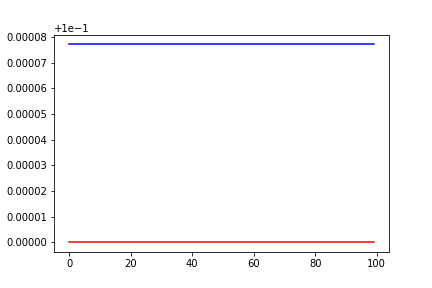

In [4]:
# inject plotting input agent's ldata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYYAAAD8CAYAAABzTgP2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAADvJJREFUeJzt3H+s3Xddx/Hny143+ZHsN2O0q7e6RlI0MnKyQUBd2BidAl100U0NDRnpPyzyQ6JFEgcDE2aQIWGSNNu0EsNGJkoj0aXshxojc6cbEcqYrRvY1m4rdEwnkVl5+8f5Vu/nerrb3nNuz+49z0dyc8/3+/3ce97ffJs+7/me26aqkCTpqB+Y9ACSpOcXwyBJahgGSVLDMEiSGoZBktQwDJKkhmGQJDUMgySpYRgkSY2ZSQ+wGGeffXbNzs5OegxJWlZ27dr1rao6Z6F1yzIMs7Oz9Pv9SY8hSctKkm8ezzpvJUmSGoZBktQwDJKkhmGQJDUMgySpYRgkSQ3DIElqGAZJUsMwSJIahkGS1DAMkqSGYZAkNQyDJKlhGCRJDcMgSWoYBklSwzBIkhqGQZLUMAySpIZhkCQ1DIMkqWEYJEkNwyBJahgGSVJjLGFIsjHJI0n2Jtk65PipSe7ojt+fZHbe8bVJnkny3nHMI0lavJHDkGQVcDNwBbABuCbJhnnLrgWeqqoLgJuAG+cd/xjwl6POIkka3TheMVwE7K2qR6vqWeB2YNO8NZuA7d3jO4FLkwQgyZXAY8DuMcwiSRrROMKwGtg3Z3t/t2/omqo6AjwNnJXkxcBvAh8cwxySpDGY9JvPHwBuqqpnFlqYZEuSfpL+oUOHln4ySZpSM2P4HgeA8+dsr+n2DVuzP8kMcBrwbeBi4KokvwucDnw/yX9W1SfnP0lVbQO2AfR6vRrD3JKkIcYRhgeA9UnWMQjA1cAvz1uzA9gM/D1wFXBPVRXwU0cXJPkA8MywKEiSTp6Rw1BVR5JcB9wFrAJuq6rdSW4A+lW1A7gV+HSSvcBhBvGQJD0PZfCD+/LS6/Wq3+9PegxJWlaS7Kqq3kLrJv3msyTpecYwSJIahkGS1DAMkqSGYZAkNQyDJKlhGCRJDcMgSWoYBklSwzBIkhqGQZLUMAySpIZhkCQ1DIMkqWEYJEkNwyBJahgGSVLDMEiSGoZBktQwDJKkhmGQJDUMgySpYRgkSQ3DIElqGAZJUsMwSJIahkGS1DAMkqSGYZAkNQyDJKlhGCRJjbGEIcnGJI8k2Ztk65Djpya5ozt+f5LZbv8bkuxK8pXu8+vHMY8kafFGDkOSVcDNwBXABuCaJBvmLbsWeKqqLgBuAm7s9n8LeHNV/QSwGfj0qPNIkkYzjlcMFwF7q+rRqnoWuB3YNG/NJmB79/hO4NIkqaqHqupfu/27gRckOXUMM0mSFmkcYVgN7Juzvb/bN3RNVR0BngbOmrfmF4AHq+p7Y5hJkrRIM5MeACDJKxjcXrr8OdZsAbYArF279iRNJknTZxyvGA4A58/ZXtPtG7omyQxwGvDtbnsN8GfAW6vqn4/1JFW1rap6VdU755xzxjC2JGmYcYThAWB9knVJTgGuBnbMW7ODwZvLAFcB91RVJTkd+AKwtar+bgyzSJJGNHIYuvcMrgPuAh4GPltVu5PckOQt3bJbgbOS7AXeAxz9ldbrgAuA307y5e7jJaPOJElavFTVpGc4Yb1er/r9/qTHkKRlJcmuquottM5/+SxJahgGSVLDMEiSGoZBktQwDJKkhmGQJDUMgySpYRgkSQ3DIElqGAZJUsMwSJIahkGS1DAMkqSGYZAkNQyDJKlhGCRJDcMgSWoYBklSwzBIkhqGQZLUMAySpIZhkCQ1DIMkqWEYJEkNwyBJahgGSVLDMEiSGoZBktQwDJKkhmGQJDXGEoYkG5M8kmRvkq1Djp+a5I7u+P1JZucce1+3/5EkbxzHPJKkxRs5DElWATcDVwAbgGuSbJi37Frgqaq6ALgJuLH72g3A1cArgI3AH3TfT5I0IeN4xXARsLeqHq2qZ4HbgU3z1mwCtneP7wQuTZJu/+1V9b2qegzY230/SdKEzIzhe6wG9s3Z3g9cfKw1VXUkydPAWd3+L8372tVjmGmod13413z5sdOW6ttL0pJ65bqn+fhDP7Pkz7Ns3nxOsiVJP0n/0KFDkx5HklascbxiOACcP2d7Tbdv2Jr9SWaA04BvH+fXAlBV24BtAL1erxYz6MkorSQtd+N4xfAAsD7JuiSnMHgzece8NTuAzd3jq4B7qqq6/Vd3v7W0DlgP/MMYZpIkLdLIrxi69wyuA+4CVgG3VdXuJDcA/araAdwKfDrJXuAwg3jQrfss8DXgCPCOqvrvUWeSJC1eBj+4Ly+9Xq/6/f6kx5CkZSXJrqrqLbRu2bz5LEk6OQyDJKlhGCRJDcMgSWoYBklSwzBIkhqGQZLUMAySpIZhkCQ1DIMkqWEYJEkNwyBJahgGSVLDMEiSGoZBktQwDJKkhmGQJDUMgySpYRgkSQ3DIElqGAZJUsMwSJIahkGS1DAMkqSGYZAkNQyDJKlhGCRJDcMgSWoYBklSwzBIkhqGQZLUGCkMSc5MsjPJnu7zGcdYt7lbsyfJ5m7fC5N8IcnXk+xO8pFRZpEkjceorxi2AndX1Xrg7m67keRM4HrgYuAi4Po5AfloVb0cuBB4bZIrRpxHkjSiUcOwCdjePd4OXDlkzRuBnVV1uKqeAnYCG6vqu1V1L0BVPQs8CKwZcR5J0ohGDcO5VXWwe/w4cO6QNauBfXO293f7/leS04E3M3jVIUmaoJmFFiT5IvDSIYfeP3ejqipJnegASWaAzwCfqKpHn2PdFmALwNq1a0/0aSRJx2nBMFTVZcc6luSJJOdV1cEk5wFPDll2ALhkzvYa4L4529uAPVX18QXm2NatpdfrnXCAJEnHZ9RbSTuAzd3jzcDnh6y5C7g8yRndm86Xd/tI8mHgNOBdI84hSRqTUcPwEeANSfYAl3XbJOkluQWgqg4DHwIe6D5uqKrDSdYwuB21AXgwyZeTvH3EeSRJI0rV8rsr0+v1qt/vT3oMSVpWkuyqqt5C6/yXz5KkhmGQJDUMgySpYRgkSQ3DIElqGAZJUsMwSJIahkGS1DAMkqSGYZAkNQyDJKlhGCRJDcMgSWoYBklSwzBIkhqGQZLUMAySpIZhkCQ1DIMkqWEYJEkNwyBJahgGSVLDMEiSGoZBktQwDJKkhmGQJDUMgySpYRgkSQ3DIElqGAZJUmOkMCQ5M8nOJHu6z2ccY93mbs2eJJuHHN+R5KujzCJJGo9RXzFsBe6uqvXA3d12I8mZwPXAxcBFwPVzA5Lk54FnRpxDkjQmo4ZhE7C9e7wduHLImjcCO6vqcFU9BewENgIkeTHwHuDDI84hSRqTUcNwblUd7B4/Dpw7ZM1qYN+c7f3dPoAPAb8HfHfEOSRJYzKz0IIkXwReOuTQ++duVFUlqeN94iSvBH60qt6dZPY41m8BtgCsXbv2eJ9GknSCFgxDVV12rGNJnkhyXlUdTHIe8OSQZQeAS+ZsrwHuA14D9JJ8o5vjJUnuq6pLGKKqtgHbAHq93nEHSJJ0Yka9lbQDOPpbRpuBzw9ZcxdweZIzujedLwfuqqpPVdXLqmoWeB3wT8eKgiTp5Bk1DB8B3pBkD3BZt02SXpJbAKrqMIP3Eh7oPm7o9kmSnodStfzuyvR6ver3+5MeQ5KWlSS7qqq30Dr/5bMkqWEYJEkNwyBJahgGSVLDMEiSGoZBktQwDJKkhmGQJDUMgySpYRgkSQ3DIElqGAZJUsMwSJIahkGS1DAMkqSGYZAkNQyDJKlhGCRJDcMgSWoYBklSwzBIkhqGQZLUMAySpIZhkCQ1DIMkqZGqmvQMJyzJIeCbi/zys4FvjXGc5WAazxmm87yn8ZxhOs97Mef8w1V1zkKLlmUYRpGkX1W9Sc9xMk3jOcN0nvc0njNM53kv5Tl7K0mS1DAMkqTGNIZh26QHmIBpPGeYzvOexnOG6TzvJTvnqXuPQZL03KbxFYMk6TlMTRiSbEzySJK9SbZOep6lkuT8JPcm+VqS3Une2e0/M8nOJHu6z2dMetZxS7IqyUNJ/qLbXpfk/u6a35HklEnPOG5JTk9yZ5KvJ3k4yWtW+rVO8u7uz/ZXk3wmyQ+txGud5LYkTyb56px9Q69tBj7Rnf8/JnnVKM89FWFIsgq4GbgC2ABck2TDZKdaMkeAX6+qDcCrgXd057oVuLuq1gN3d9srzTuBh+ds3wjcVFUXAE8B105kqqX1+8BfVdXLgZ9kcP4r9lonWQ38GtCrqh8HVgFXszKv9R8BG+ftO9a1vQJY331sAT41yhNPRRiAi4C9VfVoVT0L3A5smvBMS6KqDlbVg93jf2fwF8VqBue7vVu2HbhyMhMujSRrgJ8Dbum2A7weuLNbshLP+TTgp4FbAarq2ar6Div8WgMzwAuSzAAvBA6yAq91Vf0NcHje7mNd203AH9fAl4DTk5y32OeeljCsBvbN2d7f7VvRkswCFwL3A+dW1cHu0OPAuRMaa6l8HPgN4Pvd9lnAd6rqSLe9Eq/5OuAQ8IfdLbRbkryIFXytq+oA8FHgXxgE4WlgFyv/Wh91rGs71r/jpiUMUyfJi4E/Bd5VVf8291gNfhVtxfw6WpI3AU9W1a5Jz3KSzQCvAj5VVRcC/8G820Yr8FqfweCn43XAy4AX8f9vt0yFpby20xKGA8D5c7bXdPtWpCQ/yCAKf1JVn+t2P3H0pWX3+clJzbcEXgu8Jck3GNwmfD2De++nd7cbYGVe8/3A/qq6v9u+k0EoVvK1vgx4rKoOVdV/AZ9jcP1X+rU+6ljXdqx/x01LGB4A1ne/uXAKgzerdkx4piXR3Vu/FXi4qj4259AOYHP3eDPw+ZM921KpqvdV1ZqqmmVwbe+pql8B7gWu6patqHMGqKrHgX1JfqzbdSnwNVbwtWZwC+nVSV7Y/Vk/es4r+lrPcaxruwN4a/fbSa8Gnp5zy+mETc0/cEvyswzuQ68Cbquq35nwSEsiyeuAvwW+wv/db/8tBu8zfBZYy+B/pv3Fqpr/xtayl+QS4L1V9aYkP8LgFcSZwEPAr1bV9yY537gleSWDN9xPAR4F3sbgB74Ve62TfBD4JQa/gfcQ8HYG99NX1LVO8hngEgb/i+oTwPXAnzPk2naR/CSD22rfBd5WVf1FP/e0hEGSdHym5VaSJOk4GQZJUsMwSJIahkGS1DAMkqSGYZAkNQyDJKlhGCRJjf8BUSLqNF2c4UEAAAAASUVORK5CYII=oop
cycle = 0
orig_sense_think_act = agent.sense_think_act
def sense_think_act():
    global cycle
    cycle += 1
    orig_sense_think_act()
    sensor.append(agent.perception.joint[joint_name])
    target.append(agent.target_joints[joint_name])
    if cycle % 15 == 0:  # plot every 10 cycles
        cla()
        plot(target, '-r')
        plot(sensor, '-b')
        display.clear_output(wait=True)
        display.display(gcf())
agent.sense_think_act = sense_think_act
agent.start()
#print(agent.joint_controller.e3)